In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Stereas'
raceDate = '4/6/2023'
surface = 'Gravel'
competition = 'Championship'

link = 'https://www.ewrc-results.com/results/84073-rally-stereas-elladas-2023/?s='
startat, no_ss=423761, int(5)
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in range(0,(no_ss)):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [7]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#1,Tsouloftas Ale,C1,3:03.52,-,126.1,1,Stereas,4/6/2023,Gravel,Championship,1
1,2,#3,Papadimitriou,C1,3:05.68,+2.16 + 2.16,124.7 0.34,1,Stereas,4/6/2023,Gravel,Championship,2
2,3,#2,Kehagias Giorg,C1,3:12.79,+9.27 + 7.11,120.1 1.44,1,Stereas,4/6/2023,Gravel,Championship,3
3,4,#7,Kirkos Panagio,C2,3:17.10,+13.58 + 4.31,117.4 2.11,1,Stereas,4/6/2023,Gravel,Championship,4
4,5,#5,Panteli Petros,C1,3:19.70,+16.18 + 2.60,115.9 2.52,1,Stereas,4/6/2023,Gravel,Championship,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,23,#20,Yiangou Y. -,C2,21:27.92,+5:17.78 + 1:00.17,63.7 13.9,5,Stereas,4/6/2023,Gravel,Championship,23
23,24,#36,Andrikopoulos,C5 F2,23:32.87,+7:22.73 + 2:04.95,58.1 19.4,5,Stereas,4/6/2023,Gravel,Championship,24
24,25,#9,Vassilakis Geo,C1,25:25.70,+9:15.56 + 1:52.83,53.8 24.4,5,Stereas,4/6/2023,Gravel,Championship,25
25,26,#37,Giokaris S. -,C6 F2,26:02.13,+9:51.99 + 36.43,52.5 26.0,5,Stereas,4/6/2023,Gravel,Championship,26


In [8]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [9]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [10]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.jpg'))


In [11]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Tsouloftas Ale,C1,1,Stereas,4/6/2023,Gravel,Championship,1,183.52
1,Papadimitriou,C1,1,Stereas,4/6/2023,Gravel,Championship,2,185.68
2,Kehagias Giorg,C1,1,Stereas,4/6/2023,Gravel,Championship,3,192.79
3,Kirkos Panagio,C2,1,Stereas,4/6/2023,Gravel,Championship,4,197.10
4,Panteli Petros,C1,1,Stereas,4/6/2023,Gravel,Championship,5,199.70
...,...,...,...,...,...,...,...,...,...
22,Yiangou Y. -,C2,5,Stereas,4/6/2023,Gravel,Championship,23,1287.92
23,Andrikopoulos,C5 F2,5,Stereas,4/6/2023,Gravel,Championship,24,1412.87
24,Vassilakis Geo,C1,5,Stereas,4/6/2023,Gravel,Championship,25,1525.70
25,Giokaris S. -,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,26,1562.13


In [12]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race    ss          
Stereas 1     183.52
        2     658.94
        3     969.58
        4     642.51
        5     970.14

In [13]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Tsouloftas Ale,C1,1,Stereas,4/6/2023,Gravel,Championship,1,183.52,183.52,0.00,0.000000,01
1,Papadimitriou,C1,1,Stereas,4/6/2023,Gravel,Championship,2,185.68,183.52,2.16,1.176983,01
2,Kehagias Giorg,C1,1,Stereas,4/6/2023,Gravel,Championship,3,192.79,183.52,9.27,5.051221,01
3,Kirkos Panagio,C2,1,Stereas,4/6/2023,Gravel,Championship,4,197.10,183.52,13.58,7.399738,01
4,Panteli Petros,C1,1,Stereas,4/6/2023,Gravel,Championship,5,199.70,183.52,16.18,8.816478,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Yiangou Y. -,C2,5,Stereas,4/6/2023,Gravel,Championship,23,1287.92,970.14,317.78,32.756097,05
203,Andrikopoulos,C5 F2,5,Stereas,4/6/2023,Gravel,Championship,24,1412.87,970.14,442.73,45.635681,05
204,Vassilakis Geo,C1,5,Stereas,4/6/2023,Gravel,Championship,25,1525.70,970.14,555.56,57.265962,05
205,Giokaris S. -,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,26,1562.13,970.14,591.99,61.021090,05


In [14]:
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Tsouloftas Ale,C1,1,Stereas,4/6/2023,Gravel,Championship,1,183.52,183.52,0.00,0.000000,01
1,Papadimitriou,C1,1,Stereas,4/6/2023,Gravel,Championship,2,185.68,183.52,2.16,1.176983,01
2,Kehagias Giorg,C1,1,Stereas,4/6/2023,Gravel,Championship,3,192.79,183.52,9.27,5.051221,01
3,Kirkos Panagio,C2,1,Stereas,4/6/2023,Gravel,Championship,4,197.10,183.52,13.58,7.399738,01
4,Panteli Petros,C1,1,Stereas,4/6/2023,Gravel,Championship,5,199.70,183.52,16.18,8.816478,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Nicolaou Phivo,C2,5,Stereas,4/6/2023,Gravel,Championship,8,1083.18,970.14,113.04,11.651927,05
190,Zygogiannis K.,C2,5,Stereas,4/6/2023,Gravel,Championship,11,1116.76,970.14,146.62,15.113283,05
192,Davaris Nikos,C2,5,Stereas,4/6/2023,Gravel,Championship,13,1170.21,970.14,200.07,20.622797,05
202,Yiangou Y. -,C2,5,Stereas,4/6/2023,Gravel,Championship,23,1287.92,970.14,317.78,32.756097,05


In [15]:
ss_times_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race           Stereas                                
SS.                 01      02      03      04      05
Crew                                                  
Davaris Nikos    45.85  171.42  192.38  194.30  200.07
J.J.  - Stefan   46.70   84.95  101.19  103.73  105.22
Kafantaris Eli   35.34     NaN     NaN     NaN     NaN
Kehagias Giorg    9.27   28.47   22.55  266.60   17.50
Kirkos Panagio   13.58   56.79   66.50   54.78   43.88
Nicolaou Phivo   34.87  104.46  225.88  124.76  113.04
Panteli Petros   16.18   43.48   93.84   48.92   56.26
Papadimitriou     2.16    0.00   28.81   28.76   20.48
Serderidis Jou   17.31   49.19   55.13  176.88   52.38
Stamatopoulos    32.75  139.00  184.69     NaN     NaN
Tsouloftas Ale    0.00  181.51    0.00    0.00    0.00
Vassilakis Geo   34.98  144.58  239.99  212.56  555.56
Yiangou Y.  -    73.41  211.28  359.91  230.63  317.78
Zygogiannis K.   37.72  127.33  158.70  160.34  146.62

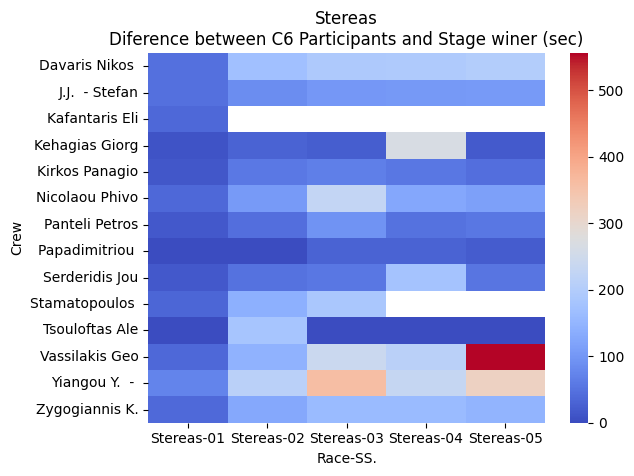

In [16]:
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between C6 Participants and Stage winer (sec)')
plt.savefig((rallyname) + "Heatmap_C1.png")

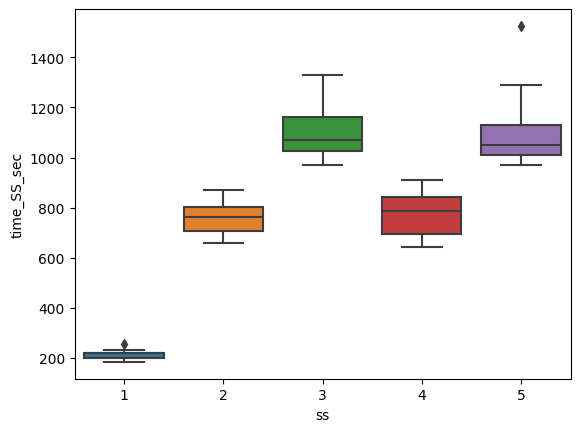

In [17]:
bplt=sns.boxplot( y=ss_times_C6["time_SS_sec"], x=ss_times_C6["ss"])

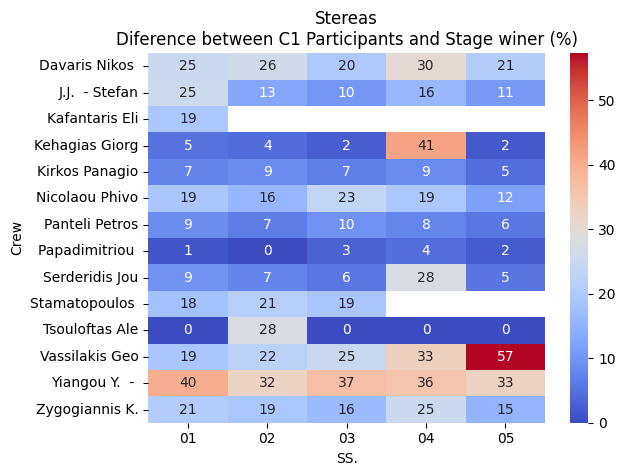

In [18]:
ss_timesa = pd.pivot_table(ss_times_C6, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between C1 Participants and Stage winer (%)')
plt.savefig(rallyname + "C1.jpg")